# Stochastic Gradient Descent Linear Regression

---

**Источники:**


[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

[sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

[Support Vector Machine: Regression](https://medium.com/it-paragon/support-vector-machine-regression-cf65348b6345)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.20.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.4'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (FuelConsumption)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [7]:
df = pd.read_csv("./../../data/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## `SGDRegressor`

Линейная модель, подобранная путем минимизации регуляризованных эмпирических потерь с помощью SGD (Стохастический градиентный спуск, Stochastic Gradient Descent).

<img src="images/batch-stochastic-mini-gd.png" height=300 width=300 />

<img src="images/batch-stochastic-mini-gd_in_one.png" height=400 width=400 />


**SGD означает стохастический градиентный спуск: градиент потерь оценивается для каждой выборки за раз, и модель обновляется по ходу с уменьшающейся силой (learning rate)**.

<img src="images/learning_rate_choice.png" height=800 width=800 />


Регуляризатор — это штраф, добавляемый к функции потерь, который сжимает параметры модели по направлению к нулевому вектору, используя либо квадрат евклидовой нормы L2, либо абсолютную норму L1, либо их комбинацию (Elastic Net). Если обновление параметра пересекает значение 0.0 из-за регуляризатора, обновление усекается до 0.0, чтобы можно было обучать разреженные модели и добиться выбора функций в режиме онлайн (online feature selection).

**Преимущества** стохастического градиентного спуска:
- Эффективность.
- Простота реализации (множество возможностей для настройки).

**Недостатки** стохастического градиентного спуска:
- SGD требует ряда гиперпараметров таких, как параметр регуляризации и количество итераций.
- SGD чувствителен к масштабированию признаков (нормализация/стандартизация).

**ВАЖНО**:
- Необходимо перемешать обучающие данные перед подгонкой (fit) модели или использовать `shuffle=True` для перемешивания после каждой итерации (используется по умолчанию).
- Кроме того, в идеале признаки должны быть стандартизированы с использованием, например, `StandardScaler()`.
- `scikit-learn` эмпирически определил, что SGD сходится после наблюдения примерно $10^6$ обучающих выборок. Таким образом, разумное первое предположение о количестве итераций: `max_iter = np.ceil (10 ** 6 / n)`, где `n` - размер обучающего набора.
- `scikit-learn` эмпирически определил усредненный SGD лучше всего работает с большим количеством признаком и более высоким `eta0`.


**`SGDRegressor`** хорошо подходит для задач регрессии с **большим количеством обучающих выборок (> 10.000)**, для других задач рекомендуются **Ridge**, **Lasso** или **ElasticNet**.

Конкретную функцию потерь можно установить с помощью параметра потерь. **SGDRegressor поддерживает следующие функции потерь**:
- `loss="squared_loss"`: [метод наименьших квадратов (МНК)](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2).
- `loss="huber"`: [функция потерь Хьюбера](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%A5%D1%8C%D1%8E%D0%B1%D0%B5%D1%80%D0%B0) для робастной регрессии, которая менее чувствительна к выбросам, чем квадратичная ошибка.
- `loss="epsilon_insensitive"`: линейная регрессия опорных векторов (SVM).

## Обучение модели (Train)

In [8]:
# разделить независимую и зависимую переменные / train и test
from sklearn.model_selection import train_test_split

y = df['CO2EMISSIONS'].copy()
X = df[['ENGINESIZE']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_regr = SGDRegressor()
sgd_regr.fit(X_train, y_train)

print('Coefficients: ', sgd_regr.coef_)
print('Intercept: ', sgd_regr.intercept_)

Coefficients:  [40.68670552]
Intercept:  [122.33874644]


## Оценка качества модели (Evaluation)

In [10]:
from sklearn.metrics import r2_score

y_predicted = sgd_regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 23.78
Residual sum of squares (MSE): 972.45
R2-score: 0.76


## Визуализация (Visualization)

Text(0, 0.5, 'Emission')

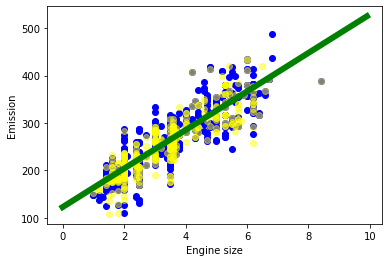

In [11]:
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = sgd_regr.intercept_+ sgd_regr.coef_[0]*XX

plt.plot(XX, yy, '-g', linewidth=6)

plt.xlabel("Engine size")
plt.ylabel("Emission")